In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
data=pd.read_csv('./Raisin_Dataset.csv')
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [6]:
#Show Key Statistics
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [8]:
# Drop the 'Class' column for the correlation matrix
numeric_df = data.drop(columns=['Class'])

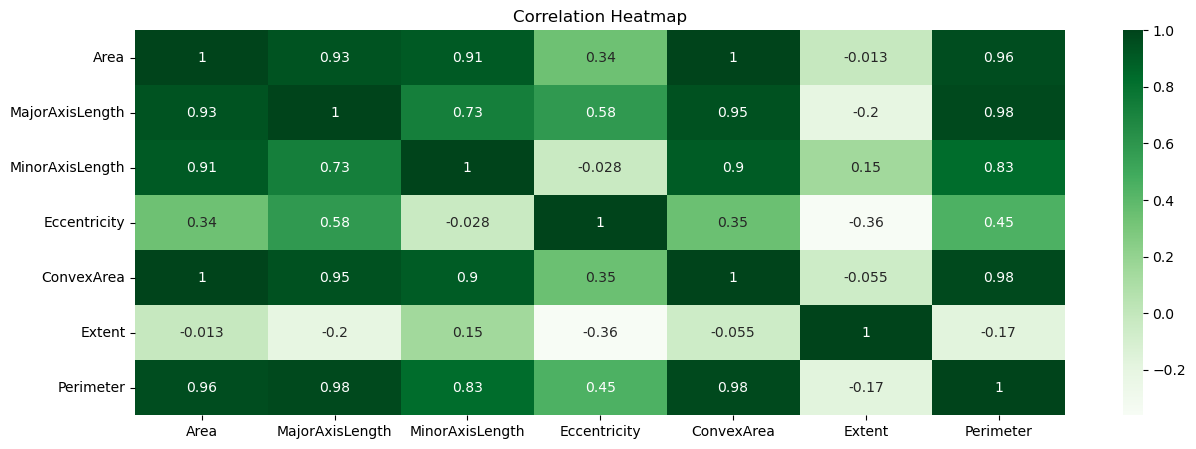

In [29]:
# Visualization of Correlations
fig = plt.figure(figsize=(15, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="Greens")
plt.title('Correlation Heatmap')
plt.show()

In [14]:
#Create x and y variables
X = data.drop('Class',axis=1).to_numpy()
y = data['Class'].to_numpy()

#Create Train and Test datasets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size = 0.20,random_state=100)

#Scale the data
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train2 = sc.fit_transform(X_train)
x_test2 = sc.transform(X_test)

In [18]:
#Script for Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('DT', DecisionTreeClassifier(random_state=100))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['Kecimen','Besni']
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))    


Estimator: DT
[[73 17]
 [19 71]]
              precision    recall  f1-score   support

     Kecimen       0.79      0.81      0.80        90
       Besni       0.81      0.79      0.80        90

    accuracy                           0.80       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.80      0.80      0.80       180



In [24]:
# Prepare data
X = data.drop('Class', axis=1)  # Keep X as a DataFrame
y = data['Class']

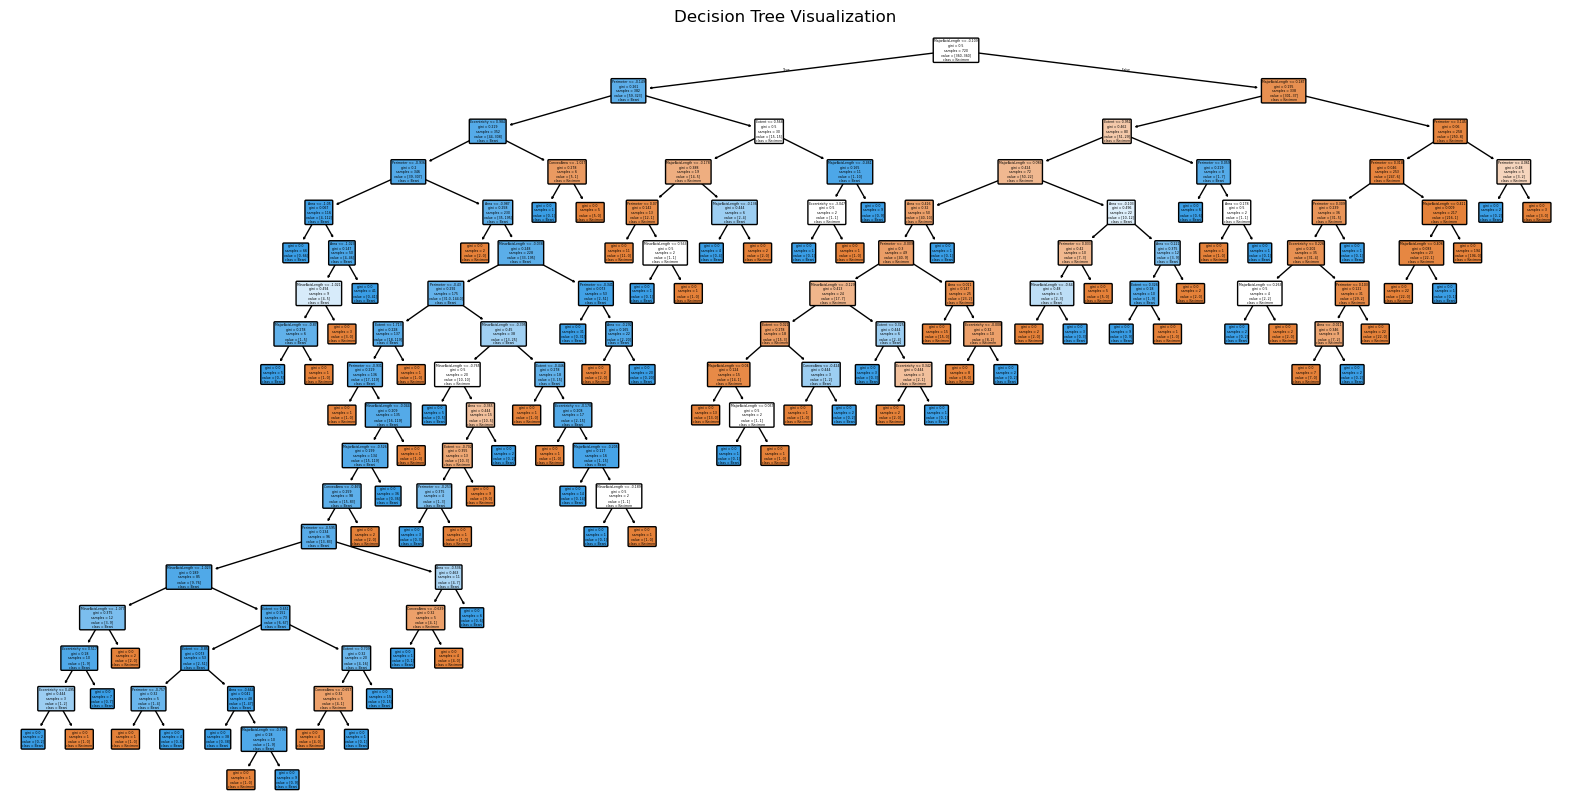

In [25]:
# Visualize the decision tree (not as part of the asg, just to explore)
plt.figure(figsize=(20, 10))
plot_tree(method, feature_names=X.columns, class_names=target_names, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

In [1]:
# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=100)
dt_model.fit(X_train, y_train)

NameError: name 'DecisionTreeClassifier' is not defined

In [34]:
# Predict on test data
y_pred = dt_model.predict(X_test)

In [35]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[73 17]
 [19 71]]


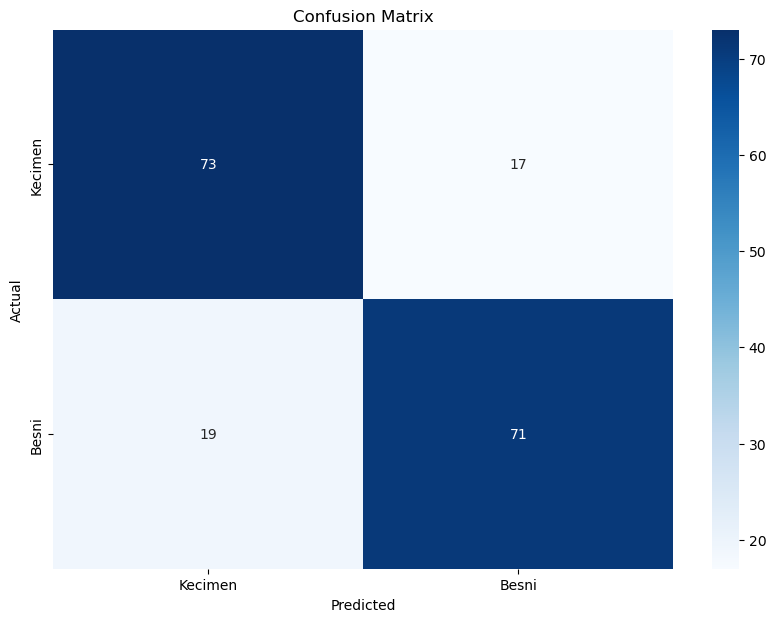

In [36]:
# Plot the confusion matrix (not as part of the asg, just doing it to explore)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
#Script for Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('DT', DecisionTreeClassifier(random_state=100))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['Kecimen','Besni']
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names)) 


Estimator: DT
[[73 17]
 [19 71]]
              precision    recall  f1-score   support

     Kecimen       0.79      0.81      0.80        90
       Besni       0.81      0.79      0.80        90

    accuracy                           0.80       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.80      0.80      0.80       180

